In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import astropy.constants as const

### load in passbands

https://www.cosmos.esa.int/web/gaia/edr3-passbands

In [3]:
pb_dir = '/scratch/aew492/quasars/GaiaEDR3_passbands_zeropoints_version2'

In [4]:
passband = np.loadtxt(os.path.join(pb_dir, 'passband.dat'))

#### labels from ReadMe:
- lambdas = wavelength
- GPb = G transmissivity curve at the corresponding wavelength
- e_GPb = uncertainty on the G transmissivity curve
- BPPb = BP transmissivity curve "
- e_BPPb = uncertainty on the "
- RPPb = RP transmissivity curve "
- e_RPPb = uncertainty on the "

In [5]:
lambdas, GPb, e_GPb, BPPb, e_BPPb, RPPb, e_RPPb = passband.T

#### convert wavelength $\rightarrow$ frequency

In [6]:
nus = const.c / lambdas

In [7]:
# set all weird >1 values to zero
GPb[np.where(GPb>1)]=0
BPPb[np.where(BPPb>1)]=0
RPPb[np.where(RPPb>1)]=0

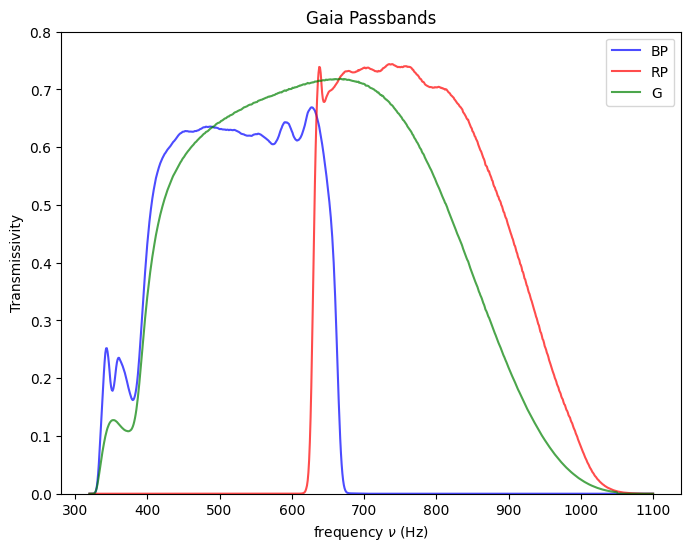

In [8]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(lambdas, BPPb, color='b', alpha=0.7, label='BP')
ax.plot(lambdas, RPPb, color='r', alpha=0.7, label='RP')
ax.plot(lambdas, GPb, color='g', alpha=0.7, label='G')

ax.set_ylim((0,.8))
ax.set_xlabel(r'frequency $\nu$ (Hz)')
ax.set_ylabel('Transmissivity')
ax.set_title('Gaia Passbands')
ax.legend()